# Abhishek Hazra. 11.24PM, 11-Feb-21.
Reference. Book "Mastering Machine Learning with Python in Six Steps" and https://gist.github.com/mick001
# Reinforcement Learning

# (Problem): Left Maze with 5 states, Right: Markov Decision process

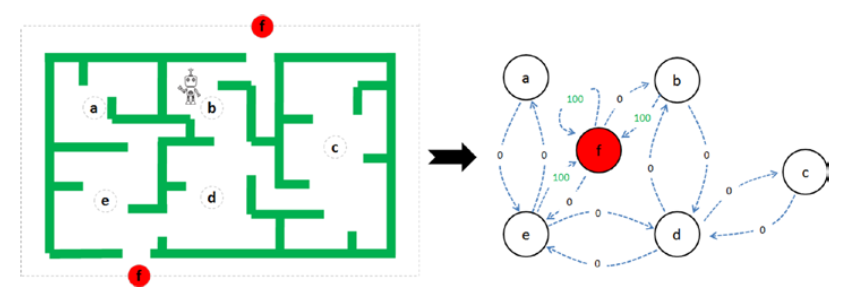

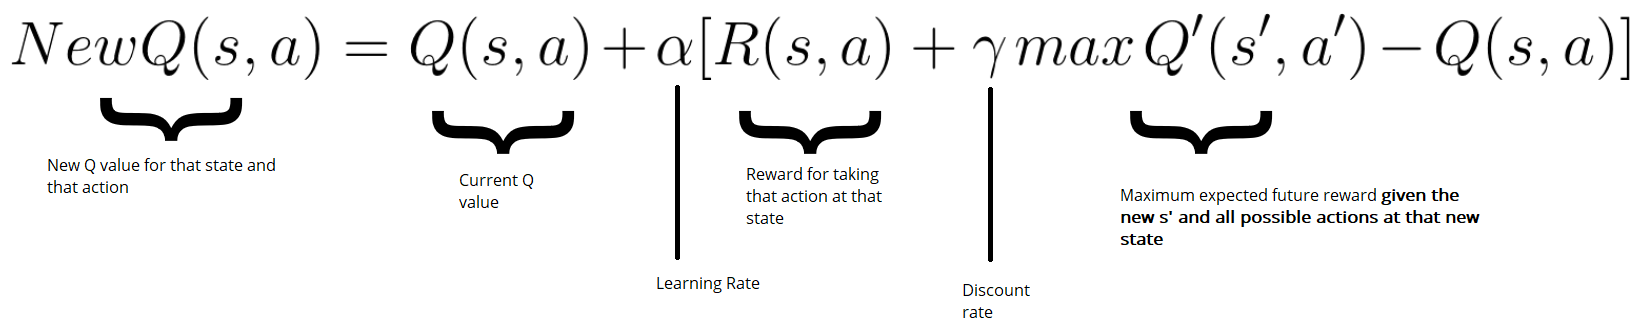

In [250]:
# import library in python
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [251]:
# R matrix
R = np.matrix([ [-1,-1,-1,-1,0,-1],
		[-1,-1,-1,0,-1,100],
		[-1,-1,-1,0,-1,-1],
		[-1,0,0,-1,0,-1],
		[-1,0,0,-1,-1,100],
		[-1,0,-1,-1,0,100] ]).astype("float32")


In [252]:
# Q matrix
Q = np.zeros_like(R)

In [253]:
# Gamma (learning parameter).
gamma = 0.8

In [254]:
# Initial state. (Usually to be chosen at random)
#initial_state = 1
initial_state = random.randint(0,4)
print(initial_state)

2


In [255]:
# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

In [256]:
# Get available actions in the current state
available_act = available_actions(initial_state) 

In [257]:
# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

In [258]:
# Sample next action to be performed
action = sample_next_action(available_act)

In [259]:
# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

In [260]:
# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)

In [261]:
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)


Trained Q matrix:
[[  0.           0.           0.           0.          79.99999523
    0.        ]
 [  0.           0.           0.          63.99999857   0.
  100.        ]
 [  0.           0.           0.          63.99999857   0.
    0.        ]
 [  0.          79.99999523  51.19999647   0.          79.99999523
    0.        ]
 [  0.          79.99999523  51.19999647   0.           0.
  100.        ]
 [  0.          79.99999523   0.           0.          79.99999523
  100.        ]]


In [262]:
# Testing

# Goal state = 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index



In [263]:
# Print selected sequence of steps
print("Selected path:")
print(steps)

Selected path:
[2, 3, 4, 5]
